In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=pd.read_excel('online_retail.xlsx',sheet_name='Online Retail')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
# Data clean up
df=df.loc[df['Quantity']>0] # حذف الداتا اللي اكبر من الصفر

df =df[pd.notnull(df['CustomerID'])] #[CustomerID محتاج الكستمر اي دي ولاكن بدون مربعات مفهاش ارقام [احذف الخنات الفارغه من )

df=df.loc[df['InvoiceDate']<'2011-12-01'] # اذا كان يوجد شهر من الشهور فاضي احذفه 
######################################################


In [5]:
# total of sales 
df['Sales']=df['Quantity']*df['UnitPrice'] #sales أحساب التوتل الخاص بي المبيعات وخزناهم في  
#**********************************************************
df.head() # في الفايل Salesهنا اضيفت خانه جديد لل 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
 #CustomerID هذه الجزئيه خاصة بلمبيعات والحجزات الخاصه   
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})
 

customer_df

,Sales,InvoiceNo
CustomerID,,
12346.0,77183.60,1
12347.0,4085.18,6
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1
...,...,...
18280.0,180.60,1
18281.0,80.82,1
18282.0,100.21,1


In [9]:
# Select the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount']

customer_df

,TotalSales,OrderCount
CustomerID,,
12346.0,77183.60,1
12347.0,4085.18,6
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1
...,...,...
18280.0,180.60,1
18281.0,80.82,1
18282.0,100.21,1


In [10]:
# create a new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

customer_df.head()


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [13]:
#//////////////////////////////////////////////
rank_df=customer_df.rank(method='first')

rank_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
...,...,...,...
18280.0,571.0,1537.0,1094.0
18281.0,104.0,1538.0,169.0
18282.0,158.0,1539.0,266.0


In [14]:
normalized_df=(rank_df-rank_df.mean())/rank_df.std()
normalized_df.head(10)
#////////////////////////////////////


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

for n_cluster in [4,5,6,7,8]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    
    silhouette_avg=silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']],
        kmeans.labels_)
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))
#///////////////////////////////////////////

Silhouette score for 4 Clusters :0.4115
Silhouette score for 5 Clusters :0.3773
Silhouette score for 6 Clusters :0.3784
Silhouette score for 7 Clusters :0.3912
Silhouette score for 8 Clusters :0.3812


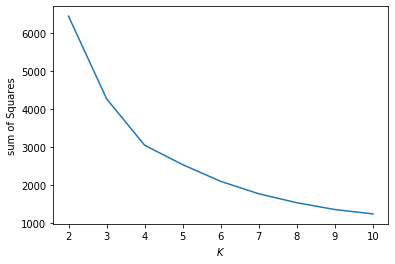

In [20]:
from sklearn import cluster
import numpy as np

sse=[]
krange = list(range(2,11))
X= normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X)
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')
plt.show()